# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [532]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [526]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [572]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

city_list = []
city_dict = {}

for city in cities:
    response = requests.get(f"{base_url}{city}&units=Imperial&appid={weather_api_key}").json()
    try:
        print(response["id"], response["name"])
        city_list.append(response)
    except KeyError:
        print("No id Available")
        
city_dict["City"] = [city_list[i]["name"] for i in range(len(city_list))]
city_dict["Lat"] = [city_list[i]["coord"]["lat"] for i in range(len(city_list))]
city_dict["Lng"] = [city_list[i]["coord"]["lon"] for i in range(len(city_list))]
city_dict["Max Temp"] = [city_list[i]["main"]["temp_max"] for i in range(len(city_list))]
city_dict["Humidity"] = [city_list[i]["main"]["humidity"] for i in range(len(city_list))]
city_dict["Cloudiness"] = [city_list[i]["clouds"]["all"] for i in range(len(city_list))]
city_dict["Wind Speed"] = [city_list[i]["wind"]["speed"] for i in range(len(city_list))]
city_dict["Country"] = [city_list[i]["sys"]["country"] for i in range(len(city_list))]
city_dict["Date"] = [city_list[i]["dt"] for i in range(len(city_list))]




632542 Vammala
4030556 Rikitea
108410 Riyadh
3369157 Cape Town
No id Available
3664659 Carauari
3985710 Cabo San Lucas
3833367 Ushuaia
3380290 Sinnamary
2017155 Saskylakh
3874787 Punta Arenas
3065759 Slušovice
4035715 Avarua
2155415 New Norfolk
2126123 Chokurdakh
964432 Port Alfred
No id Available
3372707 Ribeira Grande
No id Available
1282256 Hithadhoo
3893726 Constitución
No id Available
2966356 Bantry
2075265 Busselton
3471451 Arraial do Cabo
3831208 Qaanaaq
3899539 Antofagasta
3382160 Cayenne
6165406 Thompson
6201424 Mataura
2121385 Severo-Kuril'sk
6180550 Whitehorse
6089245 Norman Wells
1819729 Hong Kong
5848280 Kapaa
4032243 Vaini
3421765 Nanortalik
3418910 Upernavik
1801669 Luyang
3172394 Naples
4036284 Alofi
2123814 Leningradskiy
No id Available
2015306 Tiksi
5855927 Hilo
1640972 Katobu
2189343 Kaeo
778362 Øksfjord
2447416 Ayorou
No id Available
3466704 Castro
2208248 Kaitangata
2093967 Kimbe
2027042 Batagay-Alyta
3522880 Mundo Nuevo (Ojo de Agua)
1015776 Bredasdorp
2729907 Lon

1283217 Khanbari
1651531 Ambon City
2949423 Biberach an der Riss
3655446 Jipijapa
6148373 Sioux Lookout
4260977 Marion
1185239 Mathbaria
No id Available
2145554 Ulladulla
3397763 Jacareacanga
5973108 Hearst
1726449 Basco
3939761 Hualmay
4954611 Watertown
211647 Lodja
1079048 Ambovombe
2449893 Tessalit
1797117 Rongcheng
2384377 Mongoumba
2447513 Arlit
3421319 Nuuk
3647444 Calabozo
347634 Ţahţā
2126710 Beringovskiy
6096551 Pangnirtung
2021017 Kysyl-Syr
3939168 Huarmey
5044290 Saint Anthony
No id Available
149812 Sokoni
2377450 Nouakchott
5563397 Eureka
1726156 Bato
2108857 Gizo Government Station
4017987 Atoyac
2236967 Soyo
3452711 Porto Nacional
4000490 La Reforma
No id Available
2111495 Ōhara
1624041 Ternate
3421982 Maniitsoq
2022083 Kirensk
2507480 Algiers
3119841 A Coruña
5795906 Graham
No id Available
2033675 Xinmin
2093846 Kiunga
2092164 Lorengau
468671 Yasnogorsk
2338660 Yaan
2347758 Bara
300371 Soma
2989755 Octeville
3445026 Vila Velha
2071860 Esperance
4004293 Ixtapa
696478 Poro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [573]:
city_df = pd.DataFrame(city_dict)
city_df.to_csv(output_data_file, index = False)
    
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vammala,61.33,22.90,36.00,93,90,10.29,FI,1607308852
1,Rikitea,-23.12,-134.97,76.89,79,0,14.41,PF,1607308853
2,Riyadh,24.69,46.72,51.80,66,0,9.17,SA,1607308853
3,Cape Town,-33.93,18.42,64.99,87,0,12.75,ZA,1607308782
4,Carauari,-4.88,-66.90,73.58,90,99,1.95,BR,1607308853


In [574]:
city_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.881876,15.627778,52.202113,76.595628,54.174863,7.649053,1.607309e+09
std,33.224103,90.822022,27.021913,18.130318,39.962190,5.232953,7.440440e+01
min,-54.800000,-175.200000,-33.610000,13.000000,0.000000,0.200000,1.607309e+09
25%,-6.720000,-61.970000,30.990000,68.000000,9.000000,3.560000,1.607309e+09
50%,25.520000,17.680000,59.950000,82.000000,66.000000,6.710000,1.607309e+09
75%,49.600000,97.750000,75.000000,90.000000,94.000000,11.010000,1.607309e+09
max,78.220000,179.320000,99.000000,100.000000,100.000000,28.860000,1.607309e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [587]:
under_100 = city_df[city_df["Humidity"]<= 100]
under_100.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.881876,15.627778,52.202113,76.595628,54.174863,7.649053,1.607309e+09
std,33.224103,90.822022,27.021913,18.130318,39.962190,5.232953,7.440440e+01
min,-54.800000,-175.200000,-33.610000,13.000000,0.000000,0.200000,1.607309e+09
25%,-6.720000,-61.970000,30.990000,68.000000,9.000000,3.560000,1.607309e+09
50%,25.520000,17.680000,59.950000,82.000000,66.000000,6.710000,1.607309e+09
75%,49.600000,97.750000,75.000000,90.000000,94.000000,11.010000,1.607309e+09
max,78.220000,179.320000,99.000000,100.000000,100.000000,28.860000,1.607309e+09


In [588]:
#  Get the indices of cities that have humidity over 90%.
over_100 = city_df.index[city_df["Humidity"] > 100]
print(over_100)

Int64Index([], dtype='int64')


In [590]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_df.drop(index = over_100, inplace = False)
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.881876,15.627778,52.202113,76.595628,54.174863,7.649053,1.607309e+09
std,33.224103,90.822022,27.021913,18.130318,39.962190,5.232953,7.440440e+01
min,-54.800000,-175.200000,-33.610000,13.000000,0.000000,0.200000,1.607309e+09
25%,-6.720000,-61.970000,30.990000,68.000000,9.000000,3.560000,1.607309e+09
50%,25.520000,17.680000,59.950000,82.000000,66.000000,6.710000,1.607309e+09
75%,49.600000,97.750000,75.000000,90.000000,94.000000,11.010000,1.607309e+09
max,78.220000,179.320000,99.000000,100.000000,100.000000,28.860000,1.607309e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

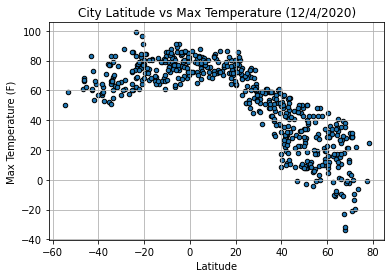

In [591]:
clean_city_data.plot(x = "Lat", y = "Max Temp", kind = "scatter", grid = True, title = "City Latitude vs Max Temperature (12/4/2020)", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Latitude vs Max Temp.png")



In [ ]:
## scatter plot examines the correlation between latitude and Max Temp, showing to closer a city is to the equater the higher the max temp. We can also see that cities south of the equator have high max temps than their lat opposites since the southern hemosphere is tilted toward the sun (summer months)

## Latitude vs. Humidity Plot

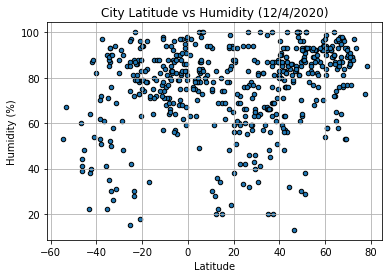

In [592]:
clean_city_data.plot(x = "Lat", y = "Humidity", kind = "scatter", grid = True, title = "City Latitude vs Humidity (12/4/2020)", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Latitude vs Humidity.png")

In [ ]:
#scatter plot showing a weak correlation between latitude and humidity

## Latitude vs. Cloudiness Plot

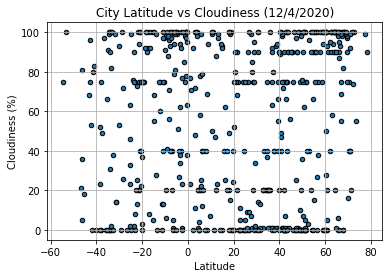

In [593]:
clean_city_data.plot(x = "Lat", y = "Cloudiness", kind = "scatter", grid = True, title = "City Latitude vs Cloudiness (12/4/2020)", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Latitude vs Cloudiness.png")

In [594]:
#scatter plot showing no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

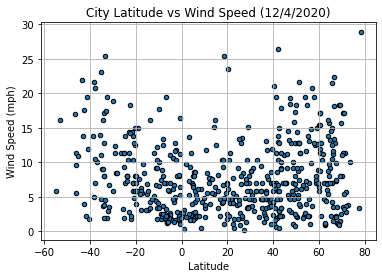

In [595]:
clean_city_data.plot(x = "Lat", y = "Wind Speed", kind = "scatter", grid = True, title = "City Latitude vs Wind Speed (12/4/2020)", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Latitude vs Wind Speed.png")

In [596]:
## scatter plot showing a slightly positive correlation in Wind Speed the further you move away from the equator 

## Linear Regression

In [612]:
nhem_df = clean_city_data[clean_city_data["Lat"] >= 0]
shem_df = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8609711670010719


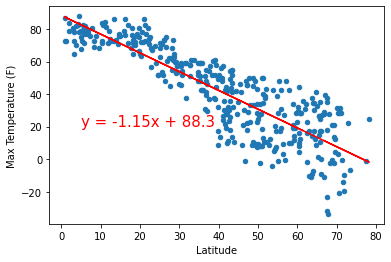

In [622]:
nhem_df.plot(x = "Lat", y = "Max Temp", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nhem_df["Lat"], nhem_df["Max Temp"])
regress_values = nhem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nhem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.savefig("Latitude vs Max Temp Regression.png")
print(f"The r-value is: {rvalue}")

In [610]:
## strong negative correlatoin between Latitude and Max Temp the further you move away from the equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.519198769893004


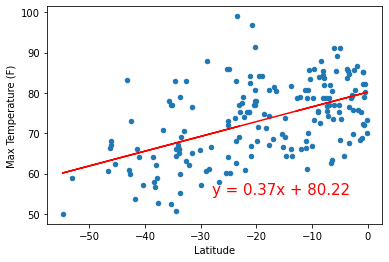

In [618]:
shem_df.plot(x = "Lat", y = "Max Temp", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(shem_df["Lat"], shem_df["Max Temp"])
regress_values = shem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(shem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-28,55),fontsize=15,color="red")
plt.savefig("Latitude vs Max Temp Regression SH.png")
print(f"The r-value is: {rvalue}")

In [619]:
#scatter plot showing a moderate positive correlation with Lat and Max temp the closer you move towards the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2944638450276033


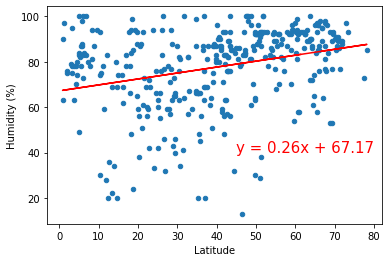

In [625]:
nhem_df.plot(x = "Lat", y = "Humidity", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nhem_df["Lat"], nhem_df["Humidity"])
regress_values = nhem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nhem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.savefig("Latitude vs Humidity Regression.png")
print(f"The r-value is: {rvalue}")

In [626]:
#scatter plot showing a weak positive correlation with Lat and humidity the further you move away from the equator

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37904782781034596


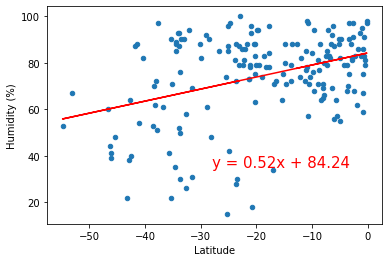

In [646]:
shem_df.plot(x = "Lat", y = "Humidity", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(shem_df["Lat"], shem_df["Humidity"])
regress_values = shem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(shem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-28,35),fontsize=15,color="red")
plt.savefig("Latitude vs Humidity Regression SH.png")
print(f"The r-value is: {rvalue}")

In [629]:
#scatter plot showing a weak positive correlation with Lat and humidity the closer you move towards the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2490444401055503


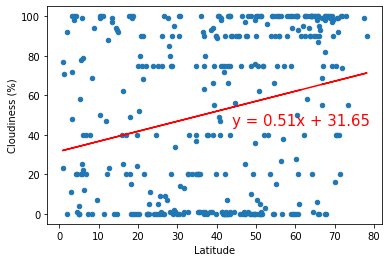

In [647]:
nhem_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nhem_df["Lat"], nhem_df["Cloudiness"])
regress_values = nhem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nhem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(44,45),fontsize=15,color="red")
plt.savefig("Latitude vs Cloudiness Regression.png")
print(f"The r-value is: {rvalue}")

In [634]:
#scatter plot showing a weak positive correlation with Lat and Cloudiness the further you move away from the equator

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2228397047501798


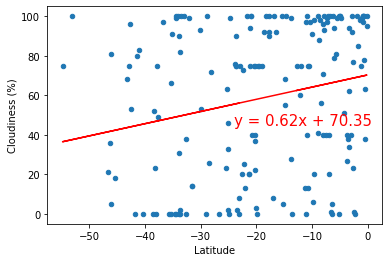

In [648]:
shem_df.plot(x = "Lat", y = "Cloudiness", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(shem_df["Lat"], shem_df["Cloudiness"])
regress_values = shem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(shem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-24,45),fontsize=15,color="red")
plt.savefig("Latitude vs Cloudiness Regression SH.png")
print(f"The r-value is: {rvalue}")

In [640]:
#scatter plot showing a weak positive correlation with Lat and Cloudiness the closer you move towards the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2571551796361247


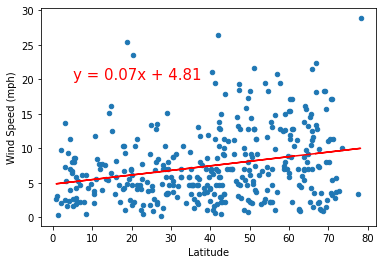

In [645]:
nhem_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nhem_df["Lat"], nhem_df["Wind Speed"])
regress_values = nhem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nhem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.savefig("Latitude vs Wind Speed Regression.png")
print(f"The r-value is: {rvalue}")

In [649]:
#scatter plot showing a weak positive correlation with Lat and Wind Speed the further you move away from the equator       

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4003288550727756


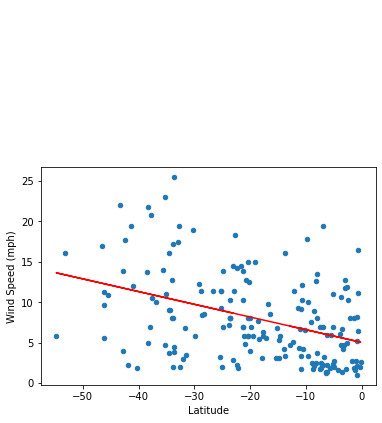

In [652]:
shem_df.plot(x = "Lat", y = "Wind Speed", kind = "scatter")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(shem_df["Lat"], shem_df["Wind Speed"])
regress_values = shem_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(shem_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-24,45),fontsize=15,color="red")
plt.savefig("Latitude vs Wind Speed Regression SH.png")
print(f"The r-value is: {rvalue}")

In [651]:
#scatter plot showing a moderate negative correlation with Lat and Wind Speed the closer you move towards the equator